UAS Deep Learning No. 3

Nama: Janice Ashley Kurniawan

NIM: 2602203794

# 3A

Generative Adversarial Network (GAN):

Arsitektur fake image generator yang digambarkan dalam gambar tersebut adalah sebuah Generative Adversarial Network (GAN). GAN adalah sebuah model machine learning yang terdiri dari dua jaringan saraf, yaitu generator dan discriminator.

> Generator -> bertanggung jawab untuk menghasilkan gambar palsu dari input acak. Generator ini dilatih dengan menggunakan algoritma backpropagation untuk meminimalkan fungsi kerugian yang mengukur seberapa baik generator dapat menipu discriminator.

> Discriminator -> bertanggung jawab untuk membedakan antara gambar nyata dan gambar palsu. Discriminator ini dilatih dengan menggunakan algoritma backpropagation untuk memaksimalkan fungsi kerugian yang mengukur seberapa baik discriminator dapat membedakan antara gambar nyata dan gambar palsu.

Proses pelatihan GAN terdiri dari dua langkah utama:
- Generator menghasilkan gambar palsu dari input acak.
- Discriminator membedakan antara gambar nyata dan gambar palsu.

Proses ini diulang secara berulang, dengan generator dan discriminator terus belajar dan meningkatkan kemampuan mereka. Seiring waktu, generator menjadi semakin baik dalam menghasilkan gambar palsu yang realistis, dan discriminator menjadi semakin baik dalam membedakan antara gambar nyata dan gambar palsu.

# 3B

In [ ]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape
from skimage.metrics import structural_similarity as ssim
from keras.optimizers import Adam

In [ ]:
!unzip FashionMNIST.zip

Archive:  FashionMNIST.zip
replace t10k-images-idx3-ubyte.gz? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: t10k-images-idx3-ubyte.gz  
  inflating: __MACOSX/._t10k-images-idx3-ubyte.gz  
  inflating: t10k-labels-idx1-ubyte.gz  
  inflating: __MACOSX/._t10k-labels-idx1-ubyte.gz  
  inflating: train-images-idx3-ubyte.gz  
  inflating: __MACOSX/._train-images-idx3-ubyte.gz  
  inflating: train-labels-idx1-ubyte.gz  
  inflating: __MACOSX/._train-labels-idx1-ubyte.gz  


In [ ]:
# function to load the images and labels

def load_mnist_images(file_path):
    with gzip.open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    return data.reshape(-1, 28, 28)

def load_mnist_labels(file_path):
    with gzip.open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [ ]:
# paths to the downloaded dataset files
train_images_path = './train-images-idx3-ubyte.gz'
train_labels_path = './train-labels-idx1-ubyte.gz'
test_images_path = './t10k-images-idx3-ubyte.gz'
test_labels_path = './t10k-labels-idx1-ubyte.gz'

# load the data
x_train = load_mnist_images(train_images_path)
y_train = load_mnist_labels(train_labels_path)
x_test = load_mnist_images(test_images_path)
y_test = load_mnist_labels(test_labels_path)

In [ ]:
# filter only Pullover (class 2) and Dress (class 3)
used_classes = [2, 3]
train_mask = np.isin(y_train, used_classes)
test_mask = np.isin(y_test, used_classes)

x_train = x_train[train_mask]
y_train = y_train[train_mask]
x_test = x_test[test_mask]
y_test = y_test[test_mask]

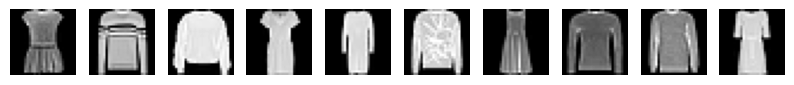

In [ ]:
# display example images
num_examples = 10
plt.figure(figsize=(10, 1))
for i in range(num_examples):
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
# reshape data to (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# scale data to [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# split dataset into train (80%), validation (10%), and test (10%) sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f'Training set size: {x_train.shape}')
print(f'Validation set size: {x_val.shape}')
print(f'Test set size: {x_test.shape}')

Training set size: (9600, 28, 28, 1)
Validation set size: (2400, 28, 28, 1)
Test set size: (2000, 28, 28, 1)


2/2 [==============================] - 0s 9ms/step
0 [D loss: 0.707541435956955 | D accuracy: 25.0] [G loss: 0.6021059155464172]
1/1 [==============================] - 0s 93ms/step


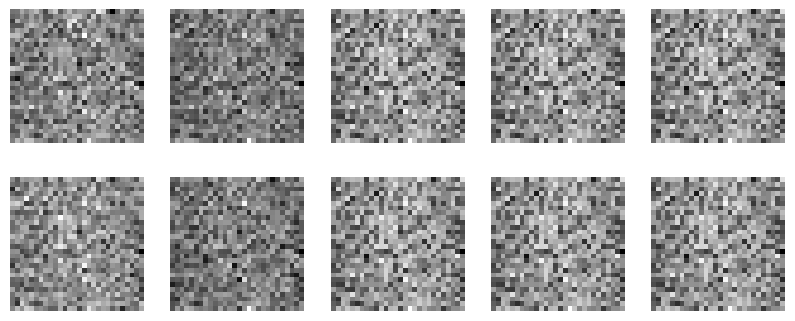

2/2 [==============================] - 0s 6ms/step
1 [D loss: 0.3701430857181549 | D accuracy: 50.0] [G loss: 0.5418206453323364]
2/2 [==============================] - 0s 4ms/step
2 [D loss: 0.3843002117937431 | D accuracy: 50.0] [G loss: 0.5556142926216125]
2/2 [==============================] - 0s 5ms/step
3 [D loss: 0.3521391798276454 | D accuracy: 50.0] [G loss: 0.8891482353210449]
2/2 [==============================] - 0s 6ms/step
4 [D loss: 0.7126753926277161 | D accuracy: 25.0] [G loss: 0.2482050657272339]
2/2 [==============================] - 0s 5ms/step
5 [D loss: 0.9518259073374509 | D accuracy: 50.0] [G loss: 0.029372191056609154]
2/2 [==============================] - 0s 5ms/step
6 [D loss: 1.6123466493756353 | D accuracy: 50.0] [G loss: 0.022770658135414124]
2/2 [==============================] - 0s 5ms/step
7 [D loss: 1.3990678990409862 | D accuracy: 50.0] [G loss: 0.16677534580230713]
2/2 [==============================] - 0s 5ms/step
8 [D loss: 0.5994527277689485 | D 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.optimizers import Adam
import cv2

# generator model
def build_generator(noise_dim, num_classes, img_size):
    noise_input = layers.Input(shape=(noise_dim,))
    label_input = layers.Input(shape=(1,), dtype='int32')

    label_embedding = layers.Embedding(num_classes, noise_dim)(label_input)
    label_embedding = layers.Flatten()(label_embedding)

    model_input = layers.multiply([noise_input, label_embedding])

    x = layers.Dense(128)(model_input)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dense(256)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dense(512)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dense(1024)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dense(img_size * img_size * 1, activation='tanh')(x)
    img_output = layers.Reshape((img_size, img_size, 1))(x)

    return Model([noise_input, label_input], img_output, name="Generator")

# discriminator model
def build_discriminator(img_size, num_classes):
    img_input = layers.Input(shape=(img_size, img_size, 1))
    label_input = layers.Input(shape=(1,), dtype='int32')

    label_embedding = layers.Embedding(num_classes, img_size * img_size)(label_input)
    label_embedding = layers.Flatten()(label_embedding)
    label_embedding = layers.Reshape((img_size, img_size, 1))(label_embedding)

    merged_input = layers.Concatenate(axis=-1)([img_input, label_embedding])

    x = layers.Flatten()(merged_input)
    x = layers.Dense(512)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dense(1024)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dense(1024)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    x = layers.Dense(512)(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    validity_output = layers.Dense(1, activation='sigmoid')(x)

    return Model([img_input, label_input], validity_output, name="Discriminator")

# parameters
noise_dim = 100
num_classes = 2
img_size = 28
batch_size = 64

# instantiate the models
generator = build_generator(noise_dim, num_classes, img_size)
discriminator = build_discriminator(img_size, num_classes)

# compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999), metrics=['accuracy'])

# create the combined GAN model
noise_input = layers.Input(shape=(noise_dim,))
label_input = layers.Input(shape=(1,))
generated_img = generator([noise_input, label_input])

# freeze the discriminator when training the generator
discriminator.trainable = False

validity = discriminator([generated_img, label_input])
combined = Model([noise_input, label_input], validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999))

# training function
def train_gan(epochs, batch_size):
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        # train Discriminator
        idx = np.random.randint(0, x_train.shape[0], batch_size)
        real_imgs = x_train[idx]
        labels = y_train[idx]

        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        gen_imgs = generator.predict([noise, labels])

        d_loss_real = discriminator.train_on_batch([real_imgs, labels], valid)
        d_loss_fake = discriminator.train_on_batch([gen_imgs, labels], fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # train Generator
        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        sampled_labels = np.random.randint(0, num_classes, batch_size).reshape(-1, 1)

        g_loss = combined.train_on_batch([noise, sampled_labels], valid)

        # print the progress
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

        # save generated images
        if epoch % 100 == 0:
            save_imgs(epoch)

# function to save generated images
def save_imgs(epoch):
    r, c = 2, 5
    noise = np.random.normal(0, 1, (r * c, noise_dim))
    sampled_labels = np.array([num for _ in range(r) for num in range(c)]).reshape(-1, 1)

    gen_imgs = generator.predict([noise, sampled_labels])

    # rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c, figsize=(10, 4))
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()

# train the GAN
epochs = 10
train_gan(epochs, batch_size)

# evaluasi menggunakan Fréchet Inception Distance (FID)
from scipy.linalg import sqrtm
from numpy import cov, trace, iscomplexobj
from numpy.random import random
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

def calculate_fid(model, images1, images2):
    # calculate activations
    act1 = model.predict(images1)
    act2 = model.predict(images2)
    # calculate mean and covariance
    mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
    mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
    # calculate sum squared difference between means
    ssdiff = np.sum((mu1 - mu2)**2.0)
    # calculate sqrt of product between cov
    covmean = sqrtm(sigma1.dot(sigma2))
    # check and correct imaginary numbers from sqrt
    if iscomplexobj(covmean):
        covmean = covmean.real
    # calculate score
    fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
    return fid

# load InceptionV3 model
inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(75, 75, 3))

# preprocess the images
def preprocess_images(images):
    images = np.repeat(images, 3, axis=-1)
    images = np.array([cv2.resize(image, (75, 75)) for image in images])
    images = preprocess_input(images)
    return images

# calculate FID
x_test_proc = preprocess_images(x_test)
gen_imgs_proc = preprocess_images(generator.predict([np.random.normal(0, 1, (x_test.shape[0], noise_dim)), y_test]))

fid = calculate_fid(inception_model, x_test_proc, gen_imgs_proc)
print('FID:', fid)

Hasil FID yang sangat tinggi, seperti 7.656119366529844e+17, menunjukkan bahwa GAN yang saya buat belum memberikan gambar-gambar yang mirip dengan data pelatihan yang sebenarnya. Kemungkinan masalahnya bisa berasal dari kurangnya kompleksitas dalam model GAN atau pengaturan yang kurang tepat. Proses persiapan gambar juga mungkin perlu diperbaiki agar lebih sesuai dengan data pelatihan yang sebenarnya. Untuk memperbaikinya, saya harus mencoba menyesuaikan kembali arsitektur GAN dengan menambahkan lapisan yang lebih kompleks dan melakukan eksperimen lebih lanjut dengan pengaturan hyperparameter. Melakukan evaluasi visual yang lebih cermat juga dapat membantu memantau perkembangan dan meningkatkan kualitas gambar yang dihasilkan oleh GAN ke depannya.

# 3C

Link Video Presentasi: https://drive.google.com/drive/folders/11YjTq-A5A8KazrkfAo_pEhYbpdW6fWrs?usp=drive_link